<a href="https://colab.research.google.com/github/Sandy3435/Day-7-and-8/blob/main/Loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')


In [20]:
df = df.dropna()
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [23]:
#The percentage of total loan applications that are approved

overall_approval_rate = df['Loan_Status'].value_counts(normalize=True)['Y'] * 100
print(f"Overall Approval Rate: {overall_approval_rate:.2f}%")

Overall Approval Rate: 69.17%


In [24]:
#The percentage of total loan applications that are approved according to gender

segmented_approval_rates = df.groupby('Gender')['Loan_Status'].value_counts(normalize=True).unstack() * 100
print(segmented_approval_rates)

Loan_Status          N          Y
Gender                           
Female       37.209302  62.790698
Male         29.441624  70.558376


In [25]:
#The proportion of applicants within each category

gender_distribution = df['Gender'].value_counts(normalize=True) * 100
marital_status_distribution = df['Married'].value_counts(normalize=True) * 100
education_distribution = df['Education'].value_counts(normalize=True) * 100

print(gender_distribution)
print(marital_status_distribution)
print(education_distribution)

Gender
Male      82.083333
Female    17.916667
Name: proportion, dtype: float64
Married
Yes    64.791667
No     35.208333
Name: proportion, dtype: float64
Education
Graduate        79.791667
Not Graduate    20.208333
Name: proportion, dtype: float64


In [26]:
#Average number of dependents

average_dependents = df['Dependents'].mean()
print(f"Average Number of Dependents: {average_dependents:.2f}")


Average Number of Dependents: 0.78


In [27]:
#Income Analysis

average_income = df['ApplicantIncome'].mean()
median_income = df['ApplicantIncome'].median()

print(f"Average Income: {average_income}")
print(f"Median Income: {median_income}")

Average Income: 5364.23125
Median Income: 3859.0


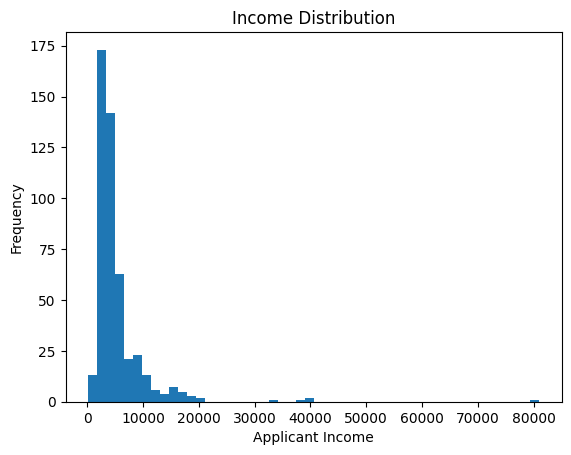

In [33]:
#Income distribution

import matplotlib.pyplot as plt

df['ApplicantIncome'].plot(kind='hist', bins=50, title='Income Distribution')
plt.xlabel('Applicant Income')
plt.show()


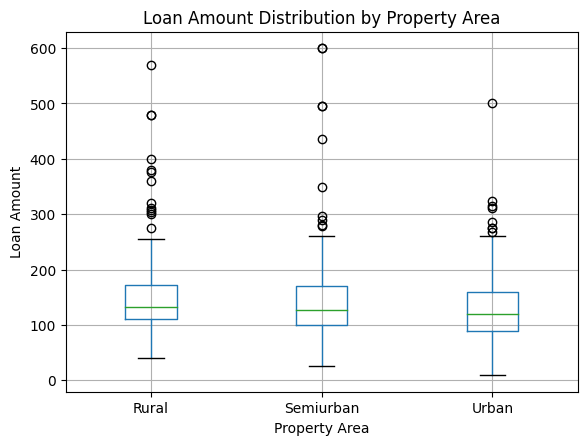

In [34]:
#Laon Amount Distribution by Factor
df.boxplot(column='LoanAmount', by='Property_Area')
plt.title('Loan Amount Distribution by Property Area')
plt.suptitle('')
plt.xlabel('Property Area')
plt.ylabel('Loan Amount')
plt.show()


In [36]:
#Education impact on loan approval
approval_by_education = df.groupby('Education')['Loan_Status'].value_counts(normalize=True).unstack() * 100
print(approval_by_education)

Loan_Status           N          Y
Education                         
Graduate      29.242820  70.757180
Not Graduate  37.113402  62.886598


In [38]:
#Employment impact on loan approval
approval_by_employment = df.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True).unstack() * 100
print(approval_by_employment)

Loan_Status            N          Y
Self_Employed                      
No             30.193237  69.806763
Yes            34.848485  65.151515
